# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
# Coluna Latitude dos municípios
latitude = sinasc_raw.munResLat
latitude.describe()

count    27027.000000
mean       -10.377988
std          1.372942
min        -13.499760
25%        -11.433870
50%        -10.435950
75%         -8.768890
max         -8.768890
Name: munResLat, dtype: float64

In [4]:
# Separando Coluna Latitude em 2 faixas (Acime de -10,5 e abaixo de 10,5)
corte_latitude = pd.cut(latitude, [-14, -10.5, 0], labels=['Abaixo de -10.5', 'Acima de -10.5'] )
corte_latitude.value_counts()

munResLat
Acima de -10.5     14034
Abaixo de -10.5    12993
Name: count, dtype: int64

In [5]:
# Realizando operações de soma, media, minimo, maximo, mediana, desvio padrao e variancia em 2 variáveis nas faixas
sinasc_raw.groupby(corte_latitude)[['IDADEMAE', 'IDADEPAI']].agg({'IDADEMAE':[('soma','sum'),('média', 'mean'),
                                    ('mínimo', 'min'), ('máximo', 'max'), ('mediana', 'median'),
                                    ('desvio padrão', 'std'),('variância', 'var')],
                                    'IDADEPAI':[('soma','sum'),('média', 'mean'),
                                    ('mínimo', 'min'), ('máximo', 'max'), ('mediana', 'median'),
                                    ('desvio padrão', 'std'),('variância', 'var')]})


IDADEMAE                                                 \
                    soma      média mínimo máximo mediana desvio padrão   
munResLat                                                                 
Abaixo de -10.5   340143  26.178943     12     53    26.0      6.320385   
Acima de -10.5    365094  26.014964     11     52    25.0      6.447663   

                            IDADEPAI                                   \
                 variância      soma      média mínimo máximo mediana   
munResLat                                                               
Abaixo de -10.5  39.947272  198460.0  30.903145   15.0   86.0    30.0   
Acima de -10.5   41.572355   38038.0  32.126689   16.0   73.0    31.0   

                                          
                desvio padrão  variância  
munResLat                                 
Abaixo de -10.5      7.707002  59.397875  
Acima de -10.5       8.034214  64.548602

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [6]:
# Coluna área dos municípios
area = sinasc_raw.munResArea
area.describe()

count    27027.000000
mean     14702.799767
std      13706.177751
min        459.978000
25%       3792.998000
50%       6896.648000
75%      34096.394000
max      34096.394000
Name: munResArea, dtype: float64

In [7]:
# Separando Coluna de área em 2 faixas (Acime de 3000 e abaixo de 3000)
corte_area= pd.cut(area, [459, 3000, 35000], labels=['Abaixo de 3000', 'Acima de 3000'] )
corte_area.value_counts()

munResArea
Acima de 3000     21808
Abaixo de 3000     5219
Name: count, dtype: int64

In [8]:
# Realizando operações de soma, media, minimo, maximo, mediana, desvio padrao e variancia em 2 variáveis nas faixas
sinasc_raw.groupby(corte_area)[['APGAR1', 'APGAR5']].agg({'APGAR1':[('soma','sum'),('média', 'mean'),
                                    ('mínimo', 'min'), ('máximo', 'max'), ('mediana', 'median'),
                                    ('desvio padrão', 'std'),('variância', 'var')],
                                     'APGAR5':[('soma','sum'),('média', 'mean'),
                                    ('mínimo', 'min'), ('máximo', 'max'), ('mediana', 'median'),
                                    ('desvio padrão', 'std'),('variância', 'var')]})

APGAR1                                                \
                    soma     média mínimo máximo mediana desvio padrão   
munResArea                                                               
Abaixo de 3000   42070.0  8.073306    0.0   10.0     8.0      1.008790   
Acima de 3000   177079.0  8.152808    0.0   10.0     8.0      0.978517   

                            APGAR5                                  \
               variância      soma     média mínimo máximo mediana   
munResArea                                                           
Abaixo de 3000  1.017658   47560.0  9.130351    0.0   10.0     9.0   
Acima de 3000   0.957495  199579.0  9.190836    0.0   10.0     9.0   

                                        
               desvio padrão variância  
munResArea                              
Abaixo de 3000      0.801124  0.641799  
Acima de 3000       0.787591  0.620299

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [9]:
# Coluna Altitude dos municípios
alt = sinasc_raw['munResAlt']
alt.describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [10]:
# Separando Coluna de Altitude em 4 faixas (quartis)
corte_alt = pd.qcut(sinasc_raw['munResAlt'], 4, labels=['Abaixo de 87','De 87 a 153','De 154 a 191','191 ou mais'])
corte_alt.value_counts()

munResAlt
Abaixo de 87    8774
De 154 a 191    6938
191 ou mais     6467
De 87 a 153     4848
Name: count, dtype: int64

In [11]:
# Realizando operações de soma, media, minimo, maximo, mediana, desvio padrao e variancia em 2 variáveis nas faixas
sinasc_raw.groupby(corte_alt)[['QTDFILVIVO','QTDFILMORT']].agg({'QTDFILVIVO':[('soma','sum'),('média', 'mean'),
                                    ('mínimo', 'min'), ('máximo', 'max'), ('mediana', 'median'),
                                    ('desvio padrão', 'std'),('variância', 'var')],
                                     'QTDFILMORT':[('soma','sum'),('média', 'mean'),
                                    ('mínimo', 'min'), ('máximo', 'max'), ('mediana', 'median'),
                                    ('desvio padrão', 'std'),('variância', 'var')]})

QTDFILVIVO                                                \
                   soma     média mínimo máximo mediana desvio padrão   
munResAlt                                                               
Abaixo de 87     8976.0  1.177798    0.0   12.0     1.0      1.236798   
De 87 a 153      5430.0  1.189225    0.0   14.0     1.0      1.319208   
De 154 a 191     6354.0  0.922608    0.0    9.0     1.0      1.041525   
191 ou mais      6066.0  0.950784    0.0   30.0     1.0      1.079861   

                       QTDFILMORT                                  \
             variância       soma     média mínimo máximo mediana   
munResAlt                                                           
Abaixo de 87  1.529670     2282.0  0.309550    0.0    9.0     0.0   
De 87 a 153   1.740309     1238.0  0.284860    0.0    9.0     0.0   
De 154 a 191  1.084773     1585.0  0.230949    0.0    5.0     0.0   
191 ou mais   1.166099     1538.0  0.242281    0.0   28.0     0.0   

                                      
             desvio padrão variância  
munResAlt                             
Abaixo de 87      0.642375  0.412645  
De 87 a 153       0.639574  0.409055  
De 154 a 191      0.534301  0.285477  
191 ou mais       0.638724  0.407968

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


https://pt.wikipedia.org/wiki/Lista_de_regiões_geográficas_intermediárias_e_imediatas_de_Rondônia

In [12]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [78]:
#Separando as variáveis de interesse e anexando o nome dos municipios como index
sinasc_2 = sinasc_raw[['IDADEMAE', 'munResNome']]
sinasc_municipios = sinasc_2.set_index('munResNome')
sinasc_municipios.head()

,IDADEMAE
munResNome,
Alta Floresta D'Oeste,19
Alta Floresta D'Oeste,29
Alta Floresta D'Oeste,37
Alto Alegre dos Parecis,30
Alta Floresta D'Oeste,30


In [15]:
# Media das Idades das mães por regiões remediatas
media_imediatas = sinasc_municipios.groupby(imediatas).mean()
media_imediatas

,IDADEMAE
munResNome,
Ariquemes,25.459635
Cacoal,26.347817
Jaru,25.708853
Ji-Paraná,26.094720
Porto Velho,26.166303
Vilhena,26.417143


Text(0.5, 1.0, 'Média da idade das mães X região imediata')

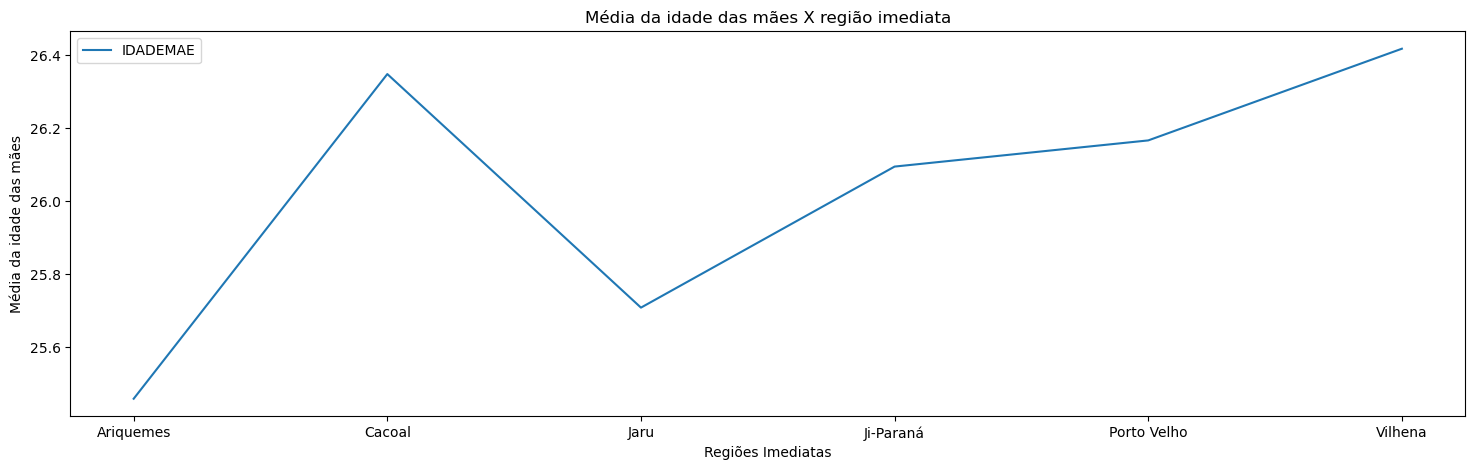

In [16]:
# Gráfico com a média de idade das mães por região imediata
sinasc_municipios.groupby(imediatas).mean().plot(figsize=[18,5])
plt.xlabel('Regiões Imediatas')
plt.ylabel('Média da idade das mães')
plt.title('Média da idade das mães X região imediata')

In [17]:
# Colocando o nome dos municipios como index
sinasc_municipios = sinasc_raw.set_index('munResNome')

Text(0.5, 1.0, 'Gráfico ao longo de 2019 X Idade media das mulheres x Região imediatas de rondonia')

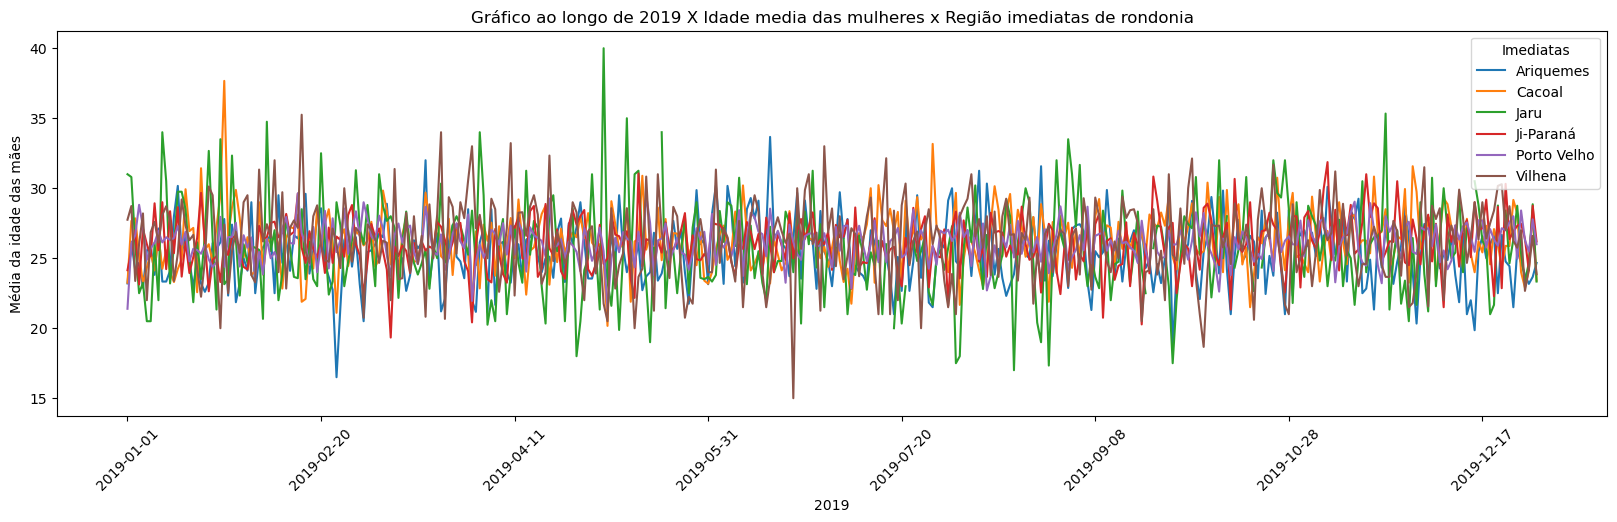

In [18]:
# Plotando grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
sinasc_municipios.groupby(['DTNASC', imediatas])['IDADEMAE'].mean().unstack().plot(figsize=[20,5])
plt.xticks(rotation=45)
plt.xlabel('2019')
plt.ylabel('Média da idade das mães')
plt.legend(loc='upper right').set_title('Imediatas')
plt.title('Gráfico ao longo de 2019 X Idade media das mulheres x Região imediatas de rondonia')

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH


O Índice de Desenvolvimento Humano varia de 0 até 1, e nesta lista é dividido em cinco categorias: IDH muito alto (0,800 – 1,000), IDH alto (0,700 – 0,799), IDH médio (0,600 0,699), IDH baixo (0,500 – 0,599) e IDH muito baixo (0,000 – 0,499).

fonte: https://pt.wikipedia.org/wiki/Lista_de_municípios_de_Rondônia_por_IDH-M

In [19]:
# DataFrame contendo os dados do estado de Rondônia obtidos diretamente do site do IBGE.
df = pd.read_excel('IBGE-RONDONIA-XLSX.xlsx',skiprows=2, nrows=52)
df.head()

,Município [-],Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022],Escolarização <span>6 a 14 anos</span> - % [2010],IDHM <span>Índice de desenvolvimento humano municipal</span> [2010],Mortalidade infantil - óbitos por mil nascidos vivos [2020],Receitas realizadas - R$ (×1000) [2017],Despesas empenhadas - R$ (×1000) [2017],PIB per capita - R$ [2021]
0,Alta Floresta D'Oeste,7067.127,21494,3.04,95.7,0.641,6.01,61193.25696,63500.28264,32619.88
1,Ariquemes,4426.571,96833,21.88,97.2,0.702,7.3,235252.82337,198489.65348,28878.27
2,Cabixi,1314.352,5351,4.07,98.1,0.650,28.99,21441.69501,19269.95172,47051.83
3,Cacoal,3793.000,86887,22.91,97.6,0.718,16.6,178701.03375,172804.94361,32313.26
4,Cerejeiras,2783.300,15890,5.71,98.5,0.692,7.43,48054.31815,42293.04848,46185.81


Fonte do Arquivo XLSX: https://www.ibge.gov.br/cidades-e-estados/ro.html

In [79]:
# Selecionando as colunas de interesse, renomeando-as e definindo a coluna de municípios como índice do DataFrame
idh = df[['Município [-]', 'IDHM <span>Índice de desenvolvimento humano municipal</span> [2010]']]
idh.columns = ['munResNome', 'IDH']
idh = idh.set_index('munResNome').rename_axis('MUNICIPIO')
IDH = idh.sort_values('IDH', ascending=False)
IDH

,IDH
MUNICIPIO,
Porto Velho,0.736
Vilhena,0.731
Cacoal,0.718
Ji-Paraná,0.714
Pimenta Bueno,0.710
Ariquemes,0.702
Rolim de Moura,0.700
Cerejeiras,0.692
Jaru,0.689


In [80]:
# Descrição da coluna IDH 
idh_describe = idh['IDH']
idh.describe()

,IDH
count,52.000000
mean,0.644038
std,0.040262
min,0.584000
25%,0.611750
50%,0.643000
75%,0.666250
max,0.736000



A média do Índice de Desenvolvimento Humano (IDH) do estado de Rondônia é de 0,644, caracterizando-se como IDH médio. O IDH máximo registrado é de 0,736, classificado como IDH alto, enquanto o mínimo é de 0,584, caracterizando-se como IDH baixo.

In [82]:
# Separando o IDH por faixas conforme explição.
corte_idh = pd.cut(idh['IDH'], [0.0, 0.499, 0.599, 0.699, 0.799, 1.0],
                   labels = ['IDH muito baixo (0,000 – 0,499)', 'IDH baixo (0,500 – 0,599)',
                             'IDH médio (0,600 - 0,699)', 'IDH alto (0,700 – 0,799)', 'IDH muito alto (0,800 – 1,000)'])
corte_idh.value_counts()

IDH
IDH médio (0,600 - 0,699)          36
IDH baixo (0,500 – 0,599)           9
IDH alto (0,700 – 0,799)            7
IDH muito baixo (0,000 – 0,499)     0
IDH muito alto (0,800 – 1,000)      0
Name: count, dtype: int64

Dos 52 municípios do estado, 36 são classificados como IDH médio, o que representa aproximadamente 69% do total. Enquanto 17% possuem IDH baixo e 13% possuem IDH alto. Não há municípios classificados com IDH muito alto nem muito baixo no estado.

In [83]:
# Media do IDH dos municipios por regiões remediatas
media_imediatas = idh.groupby(imediatas).mean().rename_axis('REGIÃO IMEDIATA')
media_imediatas.head()

,IDH
REGIÃO IMEDIATA,
Ariquemes,0.630500
Cacoal,0.655929
Jaru,0.610800
Ji-Paraná,0.636769
Porto Velho,0.648600


In [84]:
# Combinando os DataFrames sinasc_raw e idh usando a coluna 'munResNome' como chave de junção
merged_df = pd.merge(sinasc_raw, idh, left_on='munResNome', right_index=True)
merged_df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,IDH
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,0.641
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,0.641
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,0.641
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,0.641
5,1,2516500.0,110001,1,33,5.0,1 a 3 anos,621005.0,2.0,1.0,...,6,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,0.641


In [85]:
# Média da idade das mães agrupada por município e IDH
media_idade_mae_idh = merged_df.groupby(['munResNome', 'IDH']).agg({'IDADEMAE': 'mean'}).reset_index()
media_idade_mae_idh = media_idade_mae_idh.rename(columns={'IDADEMAE': 'Média Idade Mãe'})
media_idade_mae_idh = media_idade_mae_idh.rename(columns={'munResNome': 'Municipio'})
media_idade_mae_idh = media_idade_mae_idh.set_index('Municipio').sort_values('Média Idade Mãe', ascending=False)
media_idade_mae_idh.head()

,IDH,Média Idade Mãe
Municipio,,
Ministro Andreazza,0.638,27.904762
Colorado do Oeste,0.685,27.602804
Castanheiras,0.658,27.281250
Cerejeiras,0.692,27.240506
Primavera de Rondônia,0.641,27.023256


In [86]:
# Média da idade dos pais agrupada por município e IDH
media_idade_pai_idh = merged_df.groupby(['munResNome', 'IDH']).agg({'IDADEPAI': 'mean'}).reset_index()
media_idade_pai_idh = media_idade_pai_idh.rename(columns={'IDADEPAI': 'Média Idade Pai'})
media_idade_pai_idh = media_idade_pai_idh.rename(columns={'munResNome': 'Municipio'})
media_idade_pai_idh = media_idade_pai_idh.set_index('Municipio').sort_values('Média Idade Pai', ascending=False)
media_idade_pai_idh.head()

,IDH,Média Idade Pai
Municipio,,
Itapuã do Oeste,0.614,42.500000
Cacaulândia,0.646,36.333333
Pimenteiras do Oeste,0.665,35.600000
Monte Negro,0.607,34.678571
Colorado do Oeste,0.685,34.354839


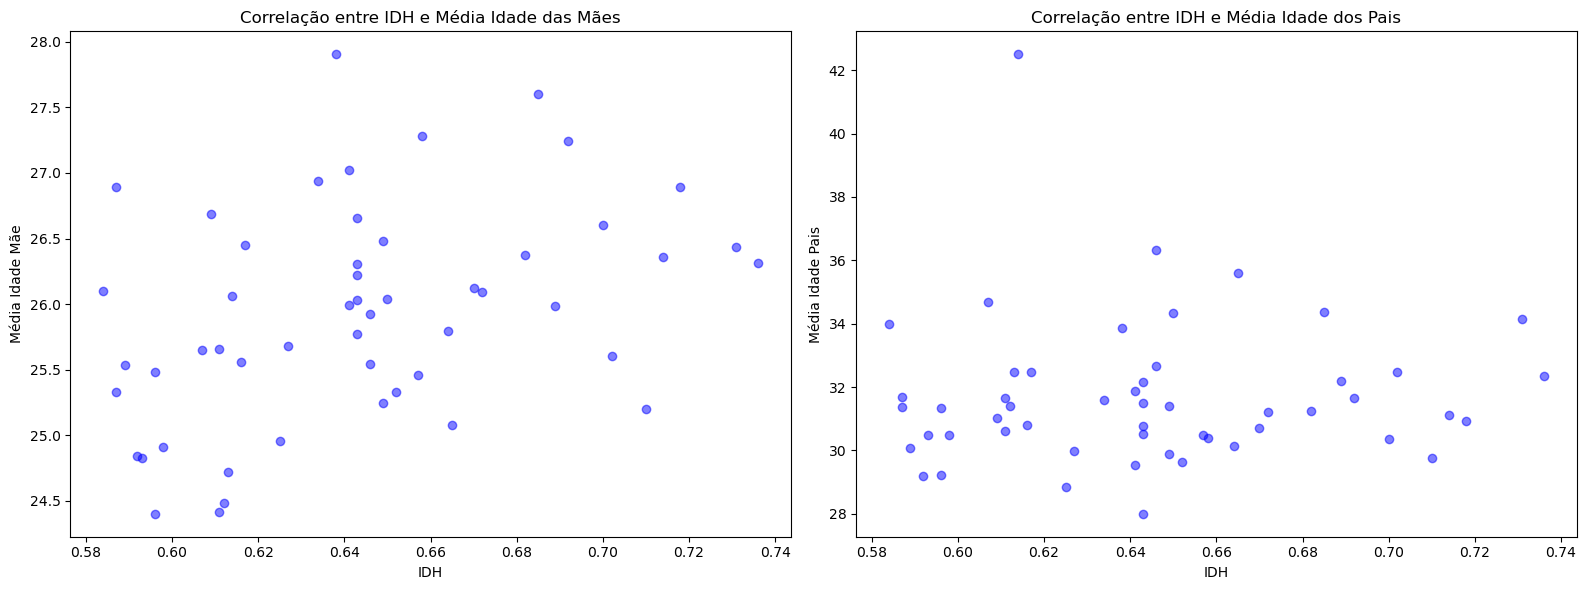

In [87]:
plt.figure(figsize=(16, 6))
# Gráfico - Correlação entre IFDM e Média idade das mães
plt.subplot(1, 2, 1)
correlacao = media_idade_mae_idh['Média Idade Mãe'].corr(media_idade_mae_idh['IDH'])
plt.scatter(media_idade_mae_idh['IDH'], media_idade_mae_idh['Média Idade Mãe'], color='blue', alpha=0.5)
plt.title('Correlação entre IDH e Média Idade das Mães')
plt.xlabel('IDH')
plt.ylabel('Média Idade Mãe')

# Gráfico - Correlação entre IFDM e Média idade dos pais
plt.subplot(1, 2, 2)
correlacao = media_idade_pai_idh['Média Idade Pai'].corr(media_idade_pai_idh['IDH'])
plt.scatter(media_idade_pai_idh['IDH'], media_idade_pai_idh['Média Idade Pai'], color='blue', alpha=0.5)
plt.title('Correlação entre IDH e Média Idade dos Pais')
plt.xlabel('IDH')
plt.ylabel('Média Idade Pais')

plt.tight_layout()

### Insight:

- Comparando o Índice de Desenvolvimento Humano (IDH) dos municípios com a média da idade das mães, observamos que, após as cidades com IDH superior a 0,64, a idade média das mães é superior a 25 anos. Em outras palavras, municípios com pontuação de 0,63 para baixo tendem a ter as menores médias de idade das mães.
 - Comparando o Índice de Desenvolvimento Humano (IDH) dos municípios com a média de idade dos pais, também não identifiquei uma relação entre ambos. Não parece haver uma correlação entre o IDH baixo dos municípios e a idade mais jovem ou mais avançada dos pais. 

In [53]:
# Média de filhos vivos por município e IDH
media_filhos_vivos_idh = merged_df.groupby(['munResNome', 'IDH']).agg({'QTDFILVIVO': 'mean'}).reset_index()
media_filhos_vivos_idh = media_filhos_vivos_idh.rename(columns={'QTDFILVIVO': 'Média qtd filhos vivos'})
media_filhos_vivos_idh = media_filhos_vivos_idh.rename(columns={'munResNome': 'Municipio'})
media_filhos_vivos_idh = media_filhos_vivos_idh.set_index('Municipio').sort_values('Média qtd filhos vivos', ascending=False)
media_filhos_vivos_idh.head()

,IDH,Média qtd filhos vivos
Municipio,,
Guajará-Mirim,0.657,1.543563
Candeias do Jamari,0.649,1.433775
Itapuã do Oeste,0.614,1.410000
Espigão D'Oeste,0.672,1.405830
Buritis,0.616,1.353846


In [54]:
# Média de filhos mortos por município e IDH
media_filhos_mortos_idh = merged_df.groupby(['munResNome', 'IDH']).agg({'QTDFILMORT': 'mean'}).reset_index()
media_filhos_mortos_idh = media_filhos_mortos_idh.rename(columns={'QTDFILMORT': 'Média qtd filhos mortos'})
media_filhos_mortos_idh = media_filhos_mortos_idh.rename(columns={'munResNome': 'Municipio'})
media_filhos_mortos_idh = media_filhos_mortos_idh.set_index('Municipio').sort_values('Média qtd filhos mortos', ascending=False)
media_filhos_mortos_idh.head()

,IDH,Média qtd filhos mortos
Municipio,,
Buritis,0.616,0.623256
Campo Novo de Rondônia,0.593,0.396396
Ministro Andreazza,0.638,0.345238
Nova Mamoré,0.587,0.332461
Novo Horizonte do Oeste,0.634,0.329897


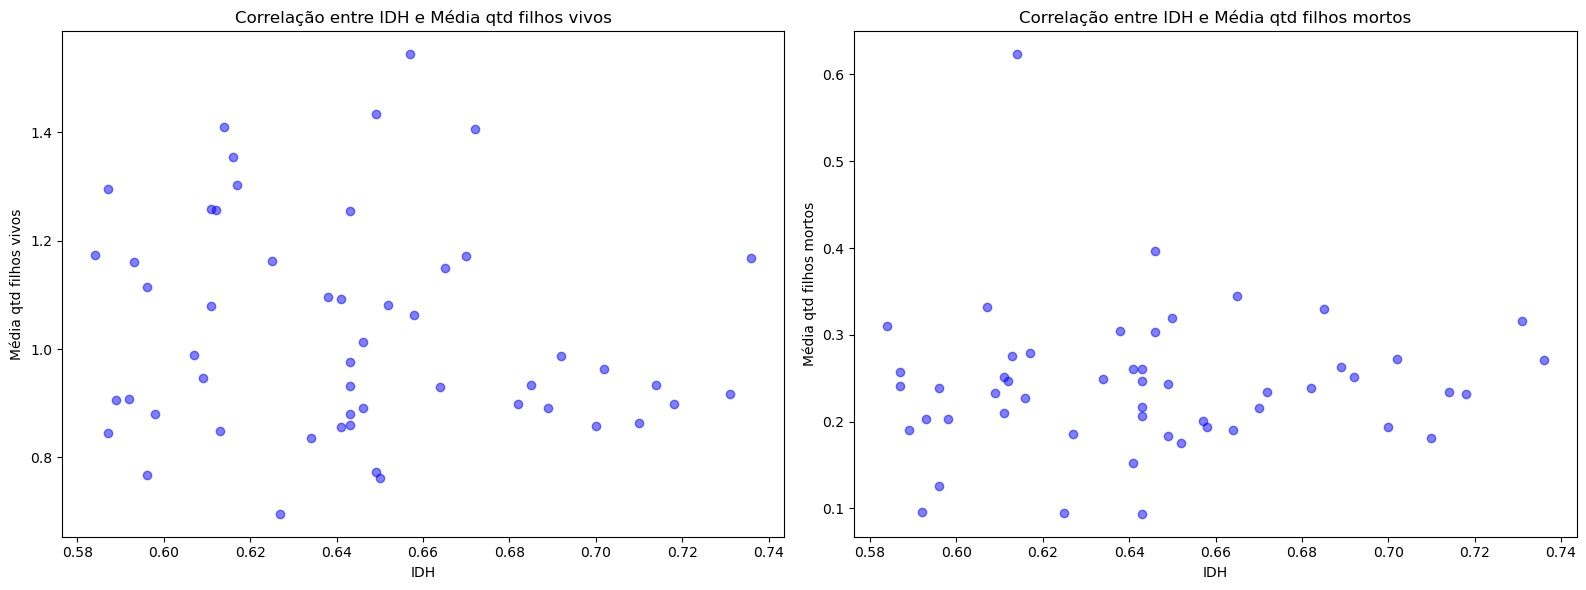

In [88]:
plt.figure(figsize=(16, 6))
# Gráfico - Correlação entre IFDM e Média qtd filhos vivos
plt.subplot(1, 2, 1)
correlacao = media_filhos_vivos_idh['Média qtd filhos vivos'].corr(media_filhos_vivos_idh['IDH'])
plt.scatter(media_filhos_vivos_idh['IDH'], media_filhos_vivos_idh['Média qtd filhos vivos'], color='blue', alpha=0.5)
plt.title('Correlação entre IDH e Média qtd filhos vivos')
plt.xlabel('IDH')
plt.ylabel('Média qtd filhos vivos')

# Gráfico - Correlação entre IFDM e Média qtd filhos mortos
plt.subplot(1, 2, 2)
correlacao = media_filhos_mortos_idh['Média qtd filhos mortos'].corr(media_filhos_mortos_idh['IDH'])
plt.scatter(media_idade_pai_idh['IDH'], media_filhos_mortos_idh['Média qtd filhos mortos'], color='blue', alpha=0.5)
plt.title('Correlação entre IDH e Média qtd filhos mortos')
plt.xlabel('IDH')
plt.ylabel('Média qtd filhos mortos')

plt.tight_layout()

### Insight:
- Após analisar o Índice de Desenvolvimento Humano (IDH) dos municípios em relação à média de filhos vivos e mortos, não foi observado nenhum padrão claro que indique uma relação direta entre o IDH mais alto e um maior número de filhos vivos. Pelo contrário, parece haver uma tendência de que mães em municípios com um IDH mais baixo tenham mais filhos vivos. Essa observação sugere que diversos fatores sociais e culturais podem influenciar essa dinâmica. Quanto aos filhos mortos, não foi identificado nenhum padrão evidente nos dados.

### 5.2 IFDM

O  Índice FIRJAN de Desenvolvimento Municipal (IFDM) varia de zero (valor mínimo) até 1 (valor máximo), sendo considerado: Baixo para resultados inferiores a 0,4 pontos; Regular para resultados entre 0,4 e 0,6 pontos; Moderado para resultados entre 0,6 e 0,8 pontos; e Alto para resultados superiores a 0,8 pontos.

Fonte:https://pt.wikipedia.org/wiki/Lista_de_municípios_de_Rondônia_por_IFDM

In [56]:
# DataFrame contendo os dados IFDM do estado de Rondônia obtidos diretamente no wikipedia.
ifdm = pd.read_excel('IFDM.xlsx')
ifdm = ifdm.set_index('munResNome')
ifdm = ifdm.sort_values('IFDM', ascending=False)
ifdm

,IFDM
munResNome,
Ariquemes,0.7746
Vilhena,0.7465
Pimenta Bueno,0.7383
Porto Velho,0.7257
Ji-Paraná,0.7117
Cacoal,0.7111
Santa Luzia d'Oeste,0.6850
Rolim de Moura,0.6785
Chupinguaia,0.6766


In [57]:
#Descrição da coluna IFDM
ifdm_describe = ifdm['IFDM']
ifdm_describe.describe()

count    52.000000
mean      0.608140
std       0.066829
min       0.456200
25%       0.564925
50%       0.598950
75%       0.645575
max       0.774600
Name: IFDM, dtype: float64

A média do  Índice FIRJAN de Desenvolvimento Municipal (IFDM) do estado de Rondônia é de 0,60 caracterizando-se entre Regular e Moderado. O maior IFDM consolidado foi de 0,774, classificado como Moderado, enquanto o mínimo é de 0,456, caracterizando-se como Regular.

In [58]:
#Separando o IFDM por faixas conforme texto acima.
corte_idfm = pd.cut(ifdm['IFDM'], [0.0, 0.3999, 0.6, 0.8, 1.0], labels=['Baixo', 'Regular', 'Moderado', 'Alto'])
corte_idfm.value_counts()

IFDM
Regular     26
Moderado    26
Baixo        0
Alto         0
Name: count, dtype: int64

Dos 52 municípios do estado, 26 são classificados como moderados e 26 como regulares, resultando em uma divisão equitativa de 50% para ambos os lados. Não há municípios classificados como altos ou baixos no estado.

In [59]:
# Combine os DataFrames sinasc_raw e ifdm usando a coluna 'munResNome' como chave de junção
merged_df2 = pd.merge(sinasc_raw, ifdm, left_on='munResNome', right_index=True)
merged_df2.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,IFDM
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,0.5046
23,1,2516500.0,110001,1,26,2.0,8 a 11 anos,999992.0,2.0,0.0,...,24,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,0.5046
24,1,2516500.0,110001,1,26,2.0,8 a 11 anos,999992.0,2.0,0.0,...,25,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,0.5046
90,1,2516500.0,110001,1,37,2.0,4 a 7 anos,999992.0,0.0,0.0,...,91,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,0.5046
105,1,2516500.0,110001,1,20,2.0,4 a 7 anos,999992.0,0.0,0.0,...,106,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,0.5046


In [60]:
# Média idade das mães por município e IFDM
media_idade_mae__ifdm = merged_df2.groupby(['munResNome', 'IFDM']).agg({'IDADEMAE': 'mean'}).reset_index()
media_idade_mae__ifdm = media_idade_mae__ifdm.rename(columns={'IDADEMAE': 'Média Idade Mãe'})
media_idade_mae__ifdm = media_idade_mae__ifdm.rename(columns={'munResNome': 'Municipio'})
media_idade_mae__ifdm = media_idade_mae__ifdm.set_index('Municipio').sort_values('Média Idade Mãe', ascending=False)
media_idade_mae__ifdm.head()

,IFDM,Média Idade Mãe
Municipio,,
Ministro Andreazza,0.5657,27.904762
Colorado do Oeste,0.6473,27.602804
Castanheiras,0.5430,27.281250
Cerejeiras,0.6137,27.240506
Primavera de Rondônia,0.6384,27.023256


### Insight:
Analisando o gráfico, identifiquei que a idade média das mães dos municípios com as menores pontuações no índice IFDM tendem a ser mais baixas (24 anos), esse comportamento não segue para as mães dos municipios com pontuação mais altas.

In [38]:
# Média idade dos pais por município e IFDM
media_idade_pai_ifdm = merged_df2.groupby(['munResNome', 'IFDM']).agg({'IDADEPAI': 'mean'}).reset_index()
media_idade_pai_ifdm = media_idade_pai_ifdm.rename(columns={'IDADEPAI': 'Média Idade Pai'})
media_idade_pai_ifdm = media_idade_pai_ifdm.rename(columns={'munResNome': 'Municipio'})
media_idade_pai_ifdm = media_idade_pai_ifdm.set_index('Municipio').sort_values('Média Idade Pai', ascending=False)
media_idade_pai_ifdm.head()

,IFDM,Média Idade Pai
Municipio,,
Itapuã do Oeste,0.5903,42.500000
Cacaulândia,0.5721,36.333333
Pimenteiras do Oeste,0.6501,35.600000
Monte Negro,0.6016,34.678571
Colorado do Oeste,0.6473,34.354839


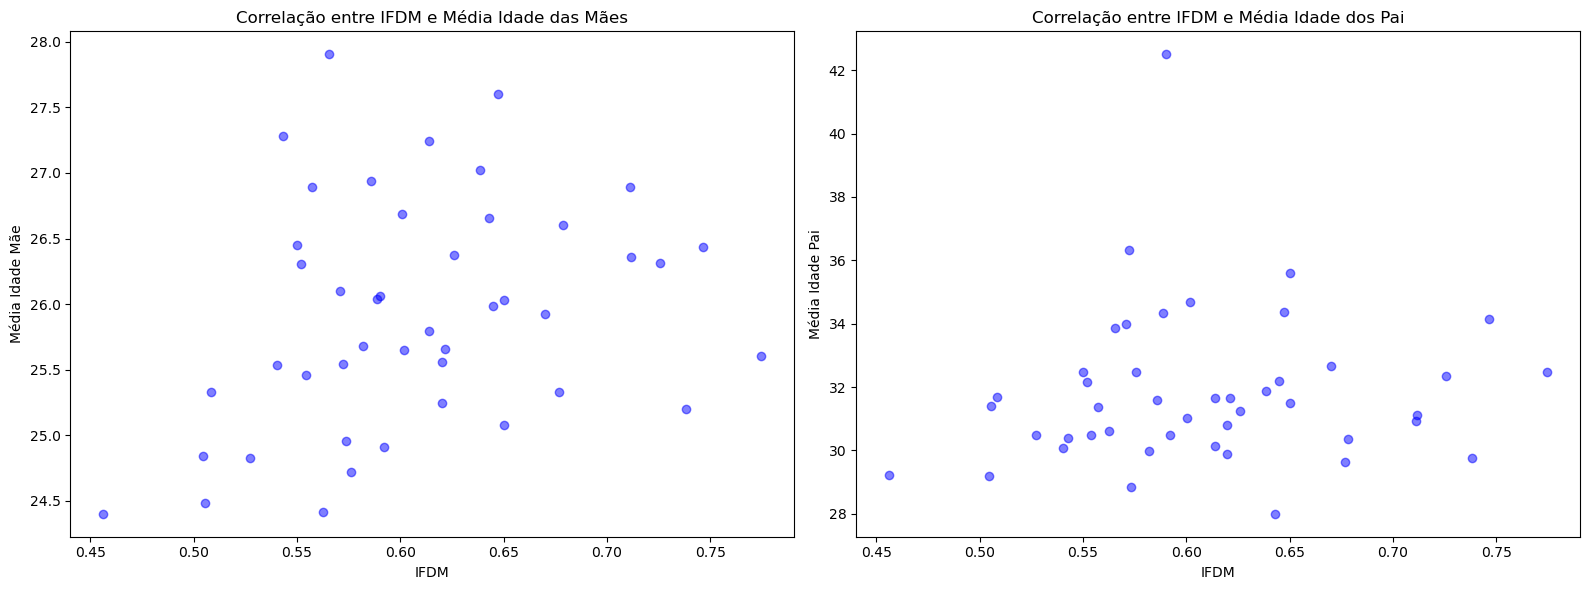

In [91]:
plt.figure(figsize=(16, 6))
# Gráfico - Correlação entre IFDM e Média idade das mães
plt.subplot(1, 2, 1)
correlacao = media_idade_mae__ifdm['Média Idade Mãe'].corr(media_idade_mae__ifdm['IFDM'])
plt.scatter(media_idade_mae__ifdm['IFDM'], media_idade_mae__ifdm['Média Idade Mãe'], color='blue', alpha=0.5)
plt.title('Correlação entre IFDM e Média Idade das Mães')
plt.xlabel('IFDM')
plt.ylabel('Média Idade Mãe')

# Gráfico - Correlação entre IFDM e Média idade dos pais
plt.subplot(1, 2, 2)
correlacao = media_idade_pai_ifdm['Média Idade Pai'].corr(media_idade_pai_ifdm['IFDM'])
plt.scatter(media_idade_pai_ifdm['IFDM'], media_idade_pai_ifdm['Média Idade Pai'], color='blue', alpha=0.5)
plt.title('Correlação entre IFDM e Média Idade dos Pai')
plt.xlabel('IFDM')
plt.ylabel('Média Idade Pai')

plt.tight_layout()

### Insight:
- Analisando o gráfico de correlação da média da idade das mães e a pontuação do IDFM, identifiquei que a idade média das mães dos municípios com as menores pontuações no índice IFDM tendem a ser mais baixas (24 anos), esse comportamento não segue para as mães dos municipios com pontuação mais altas.
- Não identifiquei uma correlação entre o baixo IFDM dos municípios e a idade mais jovem ou mais avançada dos pais.

In [40]:
media_filhos_vivos_ifdm = merged_df2.groupby(['munResNome', 'IFDM']).agg({'QTDFILVIVO': 'mean'}).reset_index()
media_filhos_vivos_ifdm = media_filhos_vivos_ifdm.rename(columns={'QTDFILVIVO': 'Média qtd filhos vivos'})
media_filhos_vivos_ifdm = media_filhos_vivos_ifdm.rename(columns={'munResNome': 'Municipio'})
media_filhos_vivos_ifdm = media_filhos_vivos_ifdm.set_index('Municipio').sort_values('Média qtd filhos vivos', ascending=False)
media_filhos_vivos_ifdm.head()

,IFDM,Média qtd filhos vivos
Municipio,,
Guajará-Mirim,0.5541,1.543563
Candeias do Jamari,0.6199,1.433775
Itapuã do Oeste,0.5903,1.410000
Buritis,0.6199,1.353846
Parecis,0.5502,1.302326


In [90]:
media_filhos_mortos_ifdm = merged_df2.groupby(['munResNome', 'IFDM']).agg({'QTDFILMORT':'mean'}).reset_index()
media_filhos_mortos_ifdm = media_filhos_mortos_ifdm.rename(columns={'QTDFILMORT':'Média qtd filhos mortos'})
media_filhos_mortos_ifdm = media_filhos_mortos_ifdm.rename(columns={'munResNome':'Municipio'})
media_filhos_mortos_ifdm = media_filhos_mortos_ifdm.set_index('Municipio').sort_values('Média qtd filhos mortos', ascending=False)
media_filhos_mortos_ifdm.head()

,IFDM,Média qtd filhos mortos
Municipio,,
Buritis,0.6199,0.623256
Campo Novo de Rondônia,0.5272,0.396396
Ministro Andreazza,0.5657,0.345238
Nova Mamoré,0.5084,0.332461
Novo Horizonte do Oeste,0.5858,0.329897


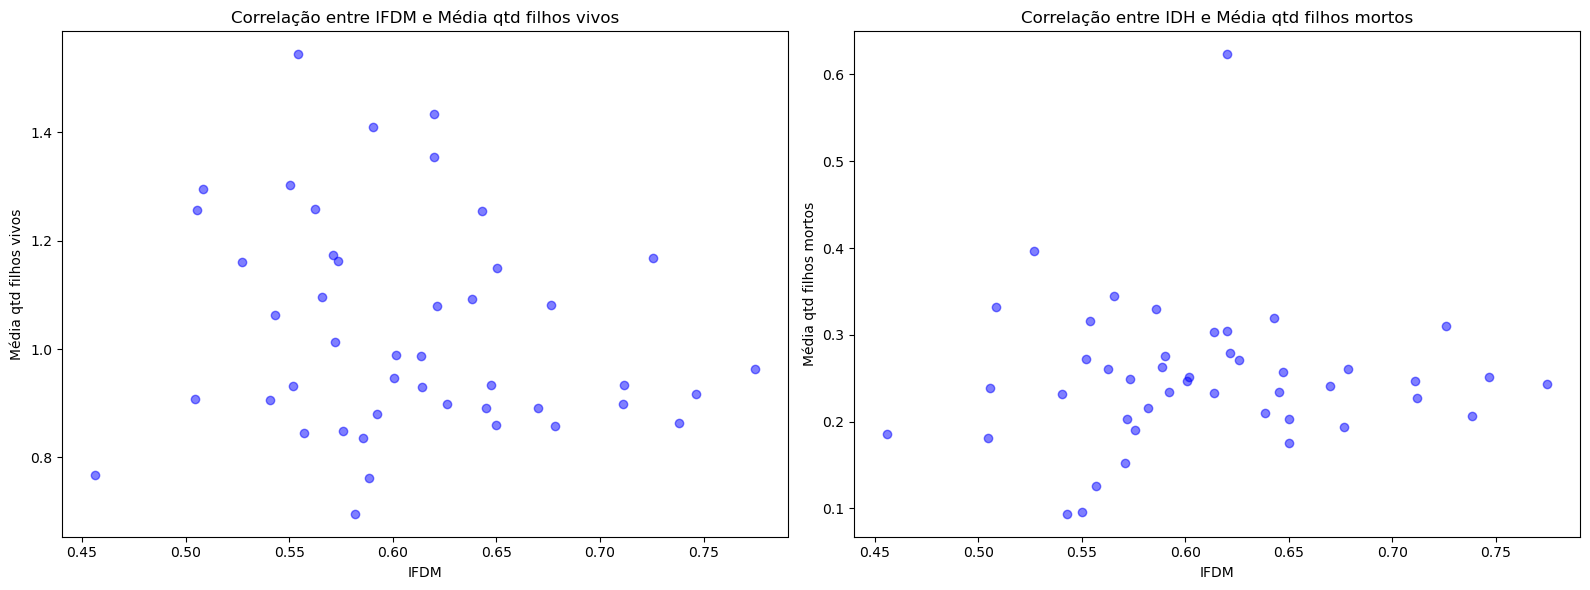

In [42]:
plt.figure(figsize=(16, 6))
# Gráfico - Correlação entre IFDM e Média qtd filhos vivos
plt.subplot(1, 2, 1)
correlacao = media_filhos_vivos_ifdm['Média qtd filhos vivos'].corr(media_filhos_vivos_ifdm['IFDM'])
plt.scatter(media_filhos_vivos_ifdm['IFDM'], media_filhos_vivos_ifdm['Média qtd filhos vivos'], color='blue', alpha=0.5)
plt.title('Correlação entre IFDM e Média qtd filhos vivos')
plt.xlabel('IFDM')
plt.ylabel('Média qtd filhos vivos')

# Gráfico - Correlação entre IFDM e Média qtd filhos mortos
plt.subplot(1, 2, 2)
correlacao = media_filhos_mortos_ifdm['Média qtd filhos mortos'].corr(media_filhos_mortos_ifdm['IFDM'])
plt.scatter(media_filhos_mortos_ifdm['IFDM'], media_filhos_mortos_ifdm['Média qtd filhos mortos'], color='blue', alpha=0.5)
plt.title('Correlação entre IDH e Média qtd filhos mortos')
plt.xlabel('IFDM')
plt.ylabel('Média qtd filhos mortos')

plt.tight_layout()

### Insight:
Analisando os gráficos, não identifiquei comportamentos que comprovem ligação entre os dados que compõem a ligação da média da quantidade de filhos vivos e mortos com a pontuação do Índice FIRJAN de Desenvolvimento Municipal (IFDM).

### 5.3 PIB


O produto interno bruto (PIB) representa a soma de todos os bens e serviços finais produzidos numa determinada região. O PIB é um dos indicadores mais utilizados na macroeconomia com o objetivo de quantificar a atividade econômica de uma região.
Fonte: https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB

Carregando a base disponibilizada no site do IBGE, percebemos que há uma coluna referente ao PIB de 2021, porém está em valores per capita. Portanto, para obtermos o valor total do PIB por município, precisaremos multiplicar o PIB per capita pelo número da população de cada município.

In [92]:
# Carregando a base disponibilizada no site do IBGE
df = pd.read_excel('IBGE-RONDONIA-XLSX.xlsx',skiprows=2, nrows=52)
# Criando a nova coluna 'PIB total' que é a multiplicação da população pelo PIB per capita
df['PIB TOTAL'] = df['PIB per capita - R$ [2021]'] * df['População residente - pessoas [2022]']
df.head()

,Município [-],Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022],Escolarização <span>6 a 14 anos</span> - % [2010],IDHM <span>Índice de desenvolvimento humano municipal</span> [2010],Mortalidade infantil - óbitos por mil nascidos vivos [2020],Receitas realizadas - R$ (×1000) [2017],Despesas empenhadas - R$ (×1000) [2017],PIB per capita - R$ [2021],PIB TOTAL
0,Alta Floresta D'Oeste,7067.127,21494,3.04,95.7,0.641,6.01,61193.25696,63500.28264,32619.88,7.011317e+08
1,Ariquemes,4426.571,96833,21.88,97.2,0.702,7.3,235252.82337,198489.65348,28878.27,2.796370e+09
2,Cabixi,1314.352,5351,4.07,98.1,0.650,28.99,21441.69501,19269.95172,47051.83,2.517743e+08
3,Cacoal,3793.000,86887,22.91,97.6,0.718,16.6,178701.03375,172804.94361,32313.26,2.807602e+09
4,Cerejeiras,2783.300,15890,5.71,98.5,0.692,7.43,48054.31815,42293.04848,46185.81,7.338925e+08


In [95]:
# Separando as colunas de interesse
pib = df[['Município [-]', 'PIB TOTAL']]
pib.columns = ['munResNome', 'PIB']
pib = pib.set_index('munResNome').rename_axis('MUNICIPIO')
pib = pib.sort_values('PIB', ascending=False)
pib.head()

,PIB
MUNICIPIO,
Porto Velho,1.682494e+10
Ji-Paraná,4.014981e+09
Vilhena,3.864791e+09
Cacoal,2.807602e+09
Ariquemes,2.796370e+09


In [45]:
#Descrição da coluna PIB
pib_describe = pib.PIB.describe()
pib_describe

count    5.200000e+01
mean     9.849748e+08
std      2.406941e+09
min      1.014664e+08
25%      2.066444e+08
50%      3.534248e+08
75%      6.921468e+08
max      1.682494e+10
Name: PIB, dtype: float64

A média do Produto Interno Bruto (PIB) do estado de Rondônia é de RS 984 milhões. O maior PIB consolidado registrado foi de RS 16 bilhões, referente à capital do estado, Porto Velho, enquanto o mínimo é de RS 101 milhões, referente ao município de Parecis.

In [97]:
#Separando o PIB por faixas.
corte_pib = pd.cut(pib['PIB'], [0.0, 100000000, 200000000, 300000000, 500000000, 1000000000, 20000000000], 
                   labels=['Até 100 Milhões', 'Acima de 100 Milhões', 'Acima de 200 Milhões', 'Acima de 300 Milhões', 
                           'Acima de 500 Milhões', 'Acima de 1 Bilhão'])
corte_pib.value_counts()

PIB
Acima de 200 Milhões    13
Acima de 100 Milhões    11
Acima de 500 Milhões    11
Acima de 300 Milhões     9
Acima de 1 Bilhão        8
Até 100 Milhões          0
Name: count, dtype: int64

Dos 52 municípios do estado de Rondônia, apenas 8 possuem PIB superior à média do estado, o que corresponde a cerca de 15% dos municípios.

In [47]:
# Combine os DataFrames sinasc_raw e pib usando a coluna 'munResNome' como chave de junção
merged_df3 = pd.merge(sinasc_raw, pib, left_on='munResNome', right_index=True)
merged_df3.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,PIB
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,7.011317e+08
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,7.011317e+08
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,7.011317e+08
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,7.011317e+08
5,1,2516500.0,110001,1,33,5.0,1 a 3 anos,621005.0,2.0,1.0,...,6,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,7.011317e+08


In [62]:
# Média idade das mães por município e PIB
media_idade_mae__pib = merged_df3.groupby(['munResNome', 'PIB']).agg({'IDADEMAE': 'mean'}).reset_index()
media_idade_mae__pib = media_idade_mae__pib.rename(columns={'IDADEMAE': 'Média Idade Mãe'})
media_idade_mae__pib = media_idade_mae__pib.rename(columns={'munResNome': 'Municipio'})
media_idade_mae__pib = media_idade_mae__pib.set_index('Municipio').sort_values('Média Idade Mãe', ascending=False)
media_idade_mae__pib.head()

,PIB,Média Idade Mãe
Municipio,,
Ministro Andreazza,2.035810e+08,27.904762
Colorado do Oeste,4.373724e+08,27.602804
Castanheiras,1.101928e+08,27.281250
Cerejeiras,7.338925e+08,27.240506
Primavera de Rondônia,1.220702e+08,27.023256


In [98]:
media_idade_pai__pib = merged_df3.groupby(['munResNome', 'PIB']).agg({'IDADEPAI': 'mean'}).reset_index()
media_idade_pai__pib = media_idade_pai__pib.rename(columns={'IDADEPAI': 'Média Idade Pai'})
media_idade_pai__pib = media_idade_pai__pib.rename(columns={'munResNome': 'Municipio'})
media_idade_pai__pib = media_idade_pai__pib.set_index('Municipio').sort_values('Média Idade Pai', ascending=False)
media_idade_pai__pib.head()

,PIB,Média Idade Pai
Municipio,,
Itapuã do Oeste,1.659434e+08,42.500000
Cacaulândia,1.811719e+08,36.333333
Pimenteiras do Oeste,2.495655e+08,35.600000
Monte Negro,2.786520e+08,34.678571
Colorado do Oeste,4.373724e+08,34.354839


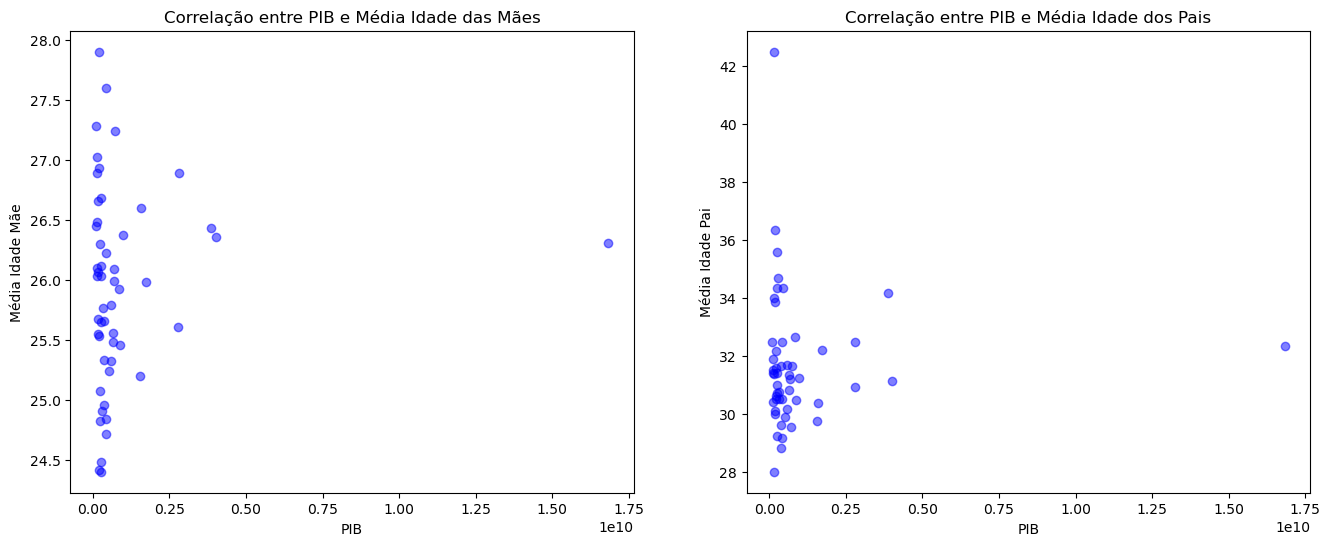

<Figure size 640x480 with 0 Axes>

In [99]:
plt.figure(figsize=(16, 6))
# Gráfico - Correlação entre PIB e Média idade da mãe
plt.subplot(1, 2, 1)
correlacao = media_idade_mae__pib['Média Idade Mãe'].corr(media_idade_mae__pib['PIB'])
plt.scatter(media_idade_mae__pib['PIB'], media_idade_mae__pib['Média Idade Mãe'], color='blue', alpha=0.5)
plt.title('Correlação entre PIB e Média Idade das Mães')
plt.xlabel('PIB')
plt.ylabel('Média Idade Mãe')


# Gráfico - Correlação entre PIB e Média idade do pai
plt.subplot(1, 2, 2)
correlacao = media_idade_pai__pib['Média Idade Pai'].corr(media_idade_pai__pib['PIB'])
plt.scatter(media_idade_pai__pib['PIB'], media_idade_pai__pib['Média Idade Pai'], color='blue', alpha=0.5)
plt.title('Correlação entre PIB e Média Idade dos Pais')
plt.xlabel('PIB')
plt.ylabel('Média Idade Pai')
plt.show()

plt.tight_layout()

### Insight:

- Não identifiquei uma correlação entre o média de idade mais jovem ou mais avançada das mães com o PIB de seus munícipios.
 - No gráfico de correlação, podemos observar que a idade média dos pais tende a ser maior. No entanto, fora isso, não encontrei dados suficientes para aprofundar nossa análise sobre a relação entre a média de idade dos pais e mães com o PIB por cidade do estado de Rondônia.

In [51]:
media_filhos_vivos__pib = merged_df3.groupby(['munResNome', 'PIB']).agg({'QTDFILVIVO': 'mean'}).reset_index()
media_filhos_vivos__pib  = media_filhos_vivos__pib.rename(columns={'QTDFILVIVO': 'Média qtd filhos vivos'})
media_filhos_vivos__pib  = media_filhos_vivos__pib.rename(columns={'munResNome': 'Municipio'})
media_filhos_vivos__pib  = media_filhos_vivos__pib.set_index('Municipio').sort_values('Média qtd filhos vivos', ascending=False)
media_filhos_vivos__pib.head()

,PIB,Média qtd filhos vivos
Municipio,,
Porto Velho,1.682494e+10,1.167236
Ji-Paraná,4.014981e+09,0.933272
Vilhena,3.864791e+09,0.917929
Cacoal,2.807602e+09,0.899123
Ariquemes,2.796370e+09,0.962253


In [66]:
media_filhos_mortos__pib = merged_df3.groupby(['munResNome', 'PIB']).agg({'QTDFILMORT': 'mean'}).reset_index()
media_filhos_mortos__pib = media_filhos_mortos__pib.rename(columns={'QTDFILMORT': 'Média qtd filhos mortos'})
media_filhos_mortos__pib = media_filhos_mortos__pib.rename(columns={'munResNome': 'Municipio'})
media_filhos_mortos__pib = media_filhos_mortos__pib.set_index('Municipio').sort_values('Média qtd filhos mortos', ascending=False)
media_filhos_mortos__pib.head()

,PIB,Média qtd filhos mortos
Municipio,,
Buritis,6.592043e+08,0.623256
Campo Novo de Rondônia,2.270008e+08,0.396396
Ministro Andreazza,2.035810e+08,0.345238
Nova Mamoré,5.871529e+08,0.332461
Novo Horizonte do Oeste,2.184522e+08,0.329897


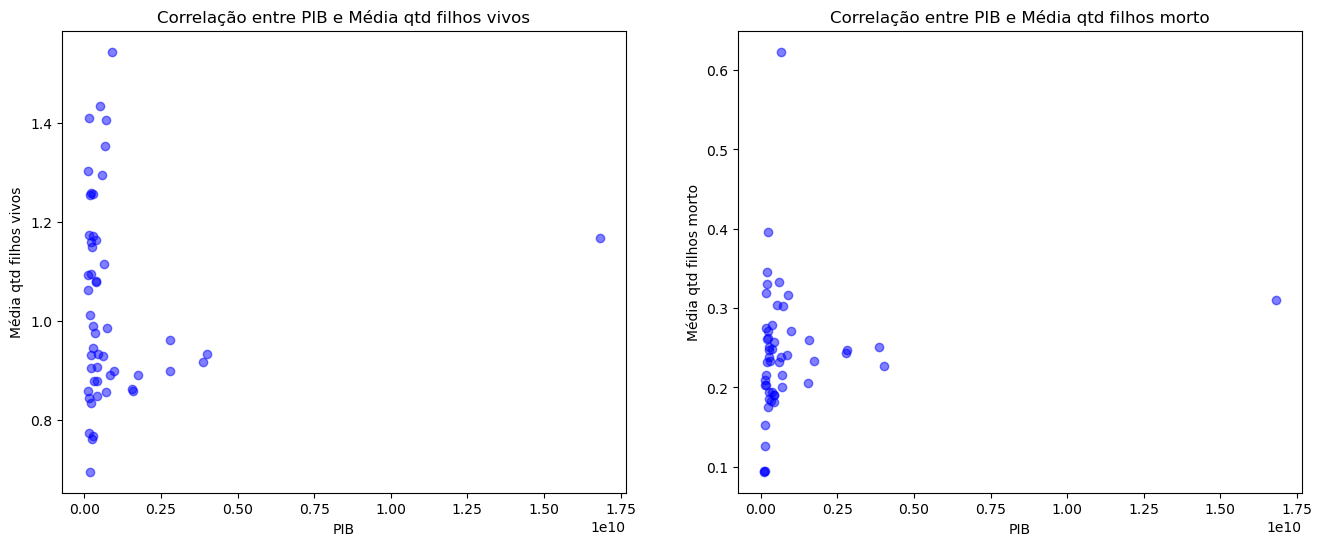

<Figure size 640x480 with 0 Axes>

In [70]:
plt.figure(figsize=(16, 6))
# Gráfico - Correlação entre PIB e Média idade da mãe
plt.subplot(1, 2, 1)
correlacao = media_filhos_vivos__pib['Média qtd filhos vivos'].corr(media_idade_mae__pib['PIB'])
plt.scatter(media_filhos_vivos__pib['PIB'], media_filhos_vivos__pib['Média qtd filhos vivos'], color='blue', alpha=0.5)
plt.title('Correlação entre PIB e Média qtd filhos vivos')
plt.xlabel('PIB')
plt.ylabel('Média qtd filhos vivos')

# Gráfico - Correlação entre PIB e Média idade do pai
plt.subplot(1, 2, 2)
correlacao = media_filhos_mortos__pib['Média qtd filhos mortos'].corr(media_filhos_mortos__pib['PIB'])
plt.scatter(media_filhos_mortos__pib['PIB'], media_filhos_mortos__pib['Média qtd filhos mortos'], color='blue', alpha=0.5)
plt.title('Correlação entre PIB e Média qtd filhos morto')
plt.xlabel('PIB')
plt.ylabel('Média qtd filhos morto')
plt.show()

plt.tight_layout()

### Insight:

- No gráfico de correlação, podemos observar que a média de filhos vivos tende a ser menor à medida que o PIB do município aumenta, excluindo a capital Porto Velho.

 - Já no gráfico de filhos mortos, não encontrei relação entre o número de filhos mortos e o PIB por município.